<a href="https://colab.research.google.com/github/jane95924/WEEK_9_IP/blob/master/WEEK_9_IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PREDICTING WHETHER A PASSENGER DIED OR SURVIVED .

##1. DEFINING THE QUESTION

a. Specifying the question

we want to classify if someone died or survived in the titatnic

b. Metrics of success

We are dealing with a classification problem, we are going to use the accuracy score to assess our model. 
80 % accuracy score is good . This means we will have accurately classified if a passenger died or survived.
c. Understanding the context

Titanic was a british liner that sank in the year 1912 April in North Atlantic ocean. The liner collided with an iceberg during her maiden voyage from Southampton enroute New York, an approximate of 1500 people died in the tragedy. The goal of this project is to complete the analysis of what sorts of people were likely to survive. 

d. Recording experimental design

 i. Loading data and initial exploration

  load the uploaded dataset

  preview the head and tail

  check the data types, shape of the datasets and the columns.

 ii. Data cleaning

  check for null values and deal with them

  check for duplicates in the dataset and deal with them

  check outliers and deal with them.  

 iii. EDA
  Univariate
  
  Bivariate
  
  Multivariate

 iv. Modelling 
     K-Nearest Neighbours

 v.   Conclusion and challenging the solution.                 

e. Data relevance

   We are provided with two datasets, a train dataset and a test dataset to    challenge our solution. Train dataset has 891 rows and 12 columns, and test has 418 rows and 12 columns. the dataset contains passengers identity and their personal information and if they did survive the titanic. we do not have many missing values except in the cabin dataset that has almost 80% missing data. 
   the other columns are appropriate to our research question. The dataset is 50-50 in terms of gender balance but we can work with that. 
   A description of the column names is not provided, i did research on it and stated them below. 

##2. LOADING DATA AND INITIAL EXPLORATION

In [1]:
#importing the libraries we will need
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#loading our uploaded test dataset and previewing the head
test_df = pd.read_csv('/content/test (1).csv')
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
#loading our train dataset and previewing the head
train_df = pd.read_csv('/content/train (5).csv')
train_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#check the data type
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

We might have to change some data types. survived is categorical, we will change that and Pclass.

In [5]:
#check the data types in the test dataset
test_df.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
#convert Pclass in test to category
test_df['Pclass']=test_df['Pclass'].astype('category')

In [6]:
#Convert the relevant data types to categorical
categoricals = ['Survived','Pclass']
for x in train_df.columns:
   if x in categoricals:
        train_df[x]=train_df[x].astype('category')

In [7]:
#check the shape of our dataset
train_df.shape

(891, 12)

our train has 891 rows and 12 columns.

In [8]:
#check the shape of the test dataset
test_df.shape

(418, 11)

The test data has 418 rows and 11 columns. he test dataset does not have the Survived column, which we will be classifying in our model

In [8]:
#confirming the columns in the test dataset
test_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
#checking columns in our train dataset.
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Data description

PassengerId - Identity of the passenger

Survived - did the passenger survive, 0 they did not and 1 they did

Pclass - passenger class,(1 = 1st; 2 = 2nd;3=3rd)

Name - name of the passenger

sex - male/female

Age - age of the passenger

SibSp - number of siblings/spouses that were on board

Parch - number of children/number of parents that were on the titanic

Ticket - ticket number

Fare - fare the passenger paid

cabin 

Embarked - where the passenger boarded the titanic(C = Cherbourg;Q = Queenstown;S = Southampton)




##3. EXTERNAL DATA SOURCE VALIDATION

The data provided has information on the titanic, if the the passenger survived or died. 
The two dataset matches dataset from kaggle,'https://www.kaggle.com/pavlofesenko/titanic-extended , variables in the data are the same, kaggle is a reliable source of data.

##4. DATA CLEANING

In [10]:
#check for null values
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We have null values in the Age column,Cabin and Embarked column. Cabin has so many missing values , we are not going to use this variable, embarked has 2 missing values, we will use the mode to fill the missing value, we will use the median to fill the missing values in age column. 

Dealing with missing values

In [11]:
# replacing the missing values in the 'Embarked' column with its mode
train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])

In [12]:
# defining a function to use in replacing the null values the Age column
def fillnulls(dataframe_name, column_name,method):
    if method == 'mean':
        dataframe_name[column_name] = dataframe_name[column_name].fillna((dataframe_name[column_name].mean()))

In [13]:
#filling in the null values in the Age column with the mean
fillnulls(train_df,'Age','mean')

In [14]:
#confirming we do not have null values in the columns we have worked on
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

We  only have missing values in the column that we are not going to use it.

In [15]:
# we will drop the cabin column
# dropping the columns since it contains very many missing values
train_df.drop('Cabin', axis = 1, inplace = True)

In [16]:
#check for missing values in the test dataset
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

We have null values in age and cabin column. We are not using the cabin column so we will ignore that, then use our function above to fill the null values in the gae column

In [17]:
#filling in the null values in the Age column with the mean
fillnulls(test_df,'Age','mean')
fillnulls(test_df,'Fare','mean')

In [18]:
# we will drop the cabin column
# dropping the columns since it contains very many missing values
test_df.drop('Cabin', axis = 1, inplace = True)

In [19]:
#checking for duplicates in the data
train_df.duplicated().sum()

0

In [19]:
#check for duplicates in the test dataset
test_df.duplicated().sum()


0

we have no duplicates in both dataset

In [20]:
#checking the train statistic in the dataset
train_df.describe()

,PassengerId,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,29.699118,0.523008,0.381594,32.204208
std,257.353842,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,35.000000,1.000000,0.000000,31.000000
max,891.000000,80.000000,8.000000,6.000000,512.329200


The total number or rows is 891
Age mean is 26, and fare mean is 32.204
Age std is 13 and that of fare is 49.69

##5. EDA

In [34]:
#checking the count of survivors in our dataset
train_df.Survived.value_counts()


0    549
1    342
Name: Survived, dtype: int64

From above, we can see that 549 people died and 342 survived. let us visualise this.

Text(0.5, 0, 'survived')

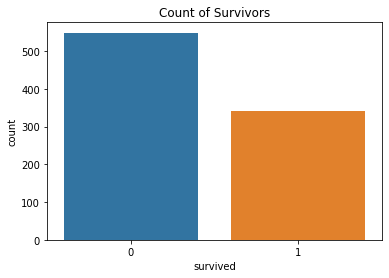

In [35]:
# we check the count of our target variable, the survivors
#
sns.countplot(x='Survived', data = train_df)
plt.title('Count of Survivors')
plt.ylabel('count')
plt.xlabel('survived')


From above, we can see that more people died than those who survived.

Text(0, 0.5, 'Count')

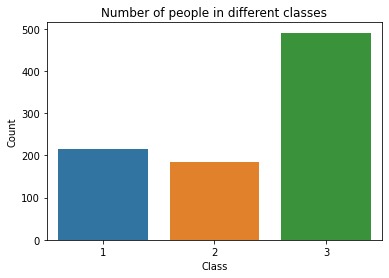

In [36]:
#let us check the number of people in different classes
sns.countplot(x='Pclass',data = train_df)
plt.title('Number of people in different classes')
plt.xlabel('Class')
plt.ylabel('Count')

From above, we can see that most people were in 3rd class followed by 1st then 2nd class.

In [40]:
# splitting age into  age groups to get a deeper understanding of our data.
conditions = [
    ((train_df.Age >= 0) & (train_df.Age <= 9)),
    ((train_df.Age >= 10) & (train_df.Age <= 19)),
    ((train_df.Age >= 20) & (train_df.Age <= 29)),
    ((train_df.Age >= 30) & (train_df.Age <= 39)),
    ((train_df.Age >= 40) & (train_df.Age <= 49)),
    ((train_df.Age >= 50) & (train_df.Age <= 59)),
    ((train_df.Age >= 60) & (train_df.Age <= 69)),
    ((train_df.Age >= 70) & (train_df.Age <= 80))
]
choices = ['G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8']
#create a column that stores our new data
train_df['age_range'] = np.select(conditions, choices)


Text(0, 0.5, 'Count')

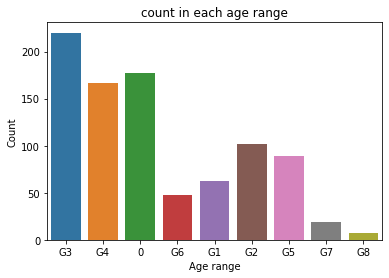

In [41]:
#check the count in the age range
sns.countplot(x='age_range',data = train_df)
plt.title('count in each age range')
plt.xlabel('Age range')
plt.ylabel('Count')


most of the people were of age 20-30, then 30-40 as we can see above.
people aged above 70 were the least in number.

Text(0.5, 0, 'Sex')

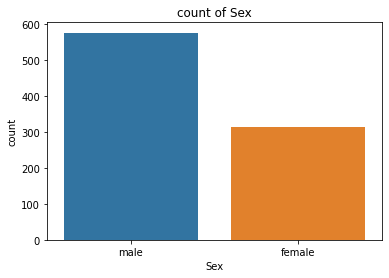

In [43]:
#lets look at the number of people with respect to gender
sns.countplot(x='Sex', data = train_df)
plt.title('count of Sex')
plt.ylabel('count')
plt.xlabel('Sex')

From above, we had more males than females.

Text(0.5, 0, 'Pclass')

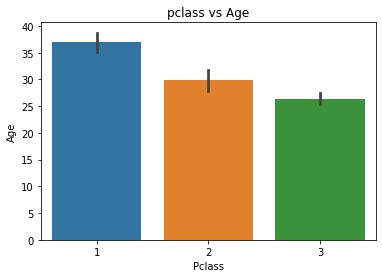

In [44]:
#we want to compare the class and age.
sns.barplot(x='Pclass',y='Age',data = train_df)
plt.title('pclass vs Age')
plt.ylabel('Age')
plt.xlabel('Pclass')

Most people who were in 3rd class were young, below age 30.

In [42]:
#checking the correlation between variables,
corr = train_df.corr()
corr

,PassengerId,Age,SibSp,Parch,Fare
PassengerId,1.000000,0.033207,-0.057527,-0.001652,0.012658
Age,0.033207,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.091566,0.159651,0.216225,1.000000


correlation of the variables amongst itself is 1 as expected.

the variables are weakly correlated, the correlation is below 0.5 for each variable.

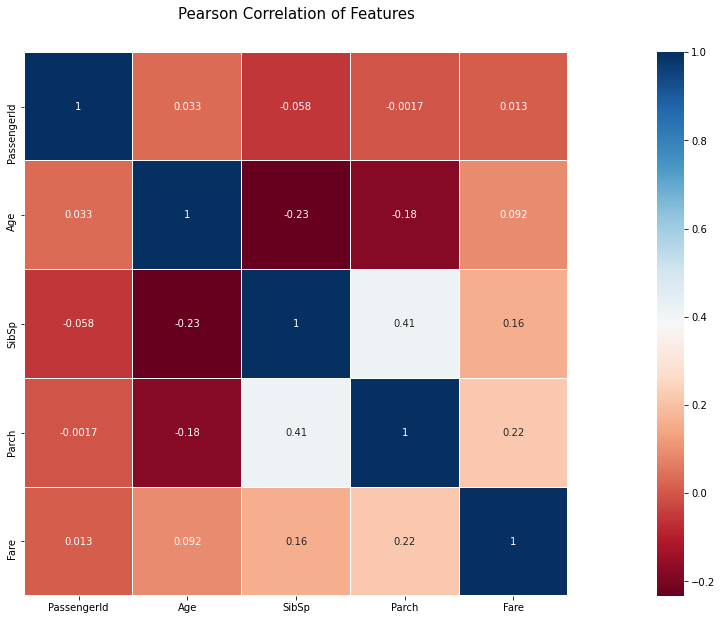

In [45]:
colormap = plt.cm.RdBu
plt.figure(figsize=(32,10))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train_df.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

our variables are weakly related and this is good for modelling.

In [21]:
#Encoding our categorical variables
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder
train_df = train_df.apply(le().fit_transform)


In [22]:
#checking if the data is now in numerics
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,0,2,108,1,28,1,0,523,18,2
1,1,1,0,190,0,52,1,0,596,207,0
2,2,1,2,353,0,34,0,0,669,41,2
3,3,1,0,272,0,48,1,0,49,189,2
4,4,0,2,15,1,48,0,0,472,43,2


our variables are now numerical

In [23]:
#we now check the correlation with the other variables 
corr2 = train_df.corr()
corr2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,-0.038559,0.042939,0.033981,-0.065229,-0.001652,-0.056554,-0.006390,0.013128
Survived,-0.005007,1.000000,-0.338481,-0.057343,-0.543351,-0.062470,-0.026385,0.081629,-0.164549,0.333943,-0.167675
Pclass,-0.035144,-0.338481,1.000000,0.052831,0.131900,-0.336631,0.078141,0.018443,0.319869,-0.724119,0.162098
Name,-0.038559,-0.057343,0.052831,1.000000,0.020314,0.057270,-0.035535,-0.049105,0.047348,-0.053846,-0.006117
Sex,0.042939,-0.543351,0.131900,0.020314,1.000000,0.078523,-0.123164,-0.245489,0.059372,-0.265389,0.108262
Age,0.033981,-0.062470,-0.336631,0.057270,0.078523,1.000000,-0.244913,-0.165137,-0.071081,0.122586,-0.023574
SibSp,-0.065229,-0.026385,0.078141,-0.035535,-0.123164,-0.244913,1.000000,0.423338,0.069238,0.368688,0.065635
Parch,-0.001652,0.081629,0.018443,-0.049105,-0.245489,-0.165137,0.423338,1.000000,0.020003,0.361243,0.039798
Ticket,-0.056554,-0.164549,0.319869,0.047348,0.059372,-0.071081,0.069238,0.020003,1.000000,-0.168153,-0.001729
Fare,-0.006390,0.333943,-0.724119,-0.053846,-0.265389,0.122586,0.368688,0.361243,-0.168153,1.000000,-0.158036


the variables are weakly correlated.

Text(0, 0.5, 'survived')

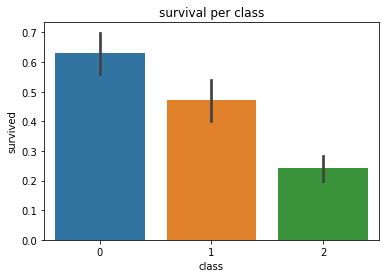

In [53]:
# Using a bar chart to compare survival to class
sns.barplot(x='Pclass', y='Survived', data=train_df)
plt.title('survival per class')
plt.xlabel('class')
plt.ylabel('survived')

In [24]:
#there are columns that we dont need so we shall drop them. 
train_df= train_df.drop(['PassengerId', 'Name', 'Ticket'],axis=1)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,2,1,28,1,0,18,2
1,1,0,0,52,1,0,207,0
2,1,2,0,34,0,0,41,2
3,1,0,0,48,1,0,189,2
4,0,2,1,48,0,0,43,2


In [25]:
#check the shapes before we model
train_df.shape

(891, 8)

In [26]:
#check the shape of test dataset
test_df.shape

(418, 10)

##6. MODELING

K-NEAREST NEIGHBOURS.

In [61]:
train_df.drop(['age_range'],axis=1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,2,1,28,1,0,18,2
1,1,0,0,52,1,0,207,0
2,1,2,0,34,0,0,41,2
3,1,0,0,48,1,0,189,2
4,0,2,1,48,0,0,43,2
...,...,...,...,...,...,...,...,...
886,0,1,1,35,0,0,85,2
887,1,0,0,24,0,0,153,2
888,0,2,0,39,1,2,131,2
889,1,0,1,34,0,0,153,0


In [27]:
#we need to split our datato independent and dependent variable
X = train_df.drop(['Survived'],axis=1)
y = train_df['Survived']


In [28]:
#import the libraries that we will need 
from sklearn.model_selection import train_test_split,KFold,RandomizedSearchCV,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error

In [29]:
##we first partition our data 80-20, we get the train and test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [30]:
# Feature Scaling
# ---we want our variables to be uniformly evaluated,  
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
#training our data and making predictions 
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [32]:
# We now make predictions on our test data 
y_pred = classifier.predict(X_test)

In [33]:
# we assess the perfomance of our matrix using a confusing matrix, we can also check the classification report.
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[98 12]
 [22 47]]
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       110
           1       0.80      0.68      0.73        69

    accuracy                           0.81       179
   macro avg       0.81      0.79      0.79       179
weighted avg       0.81      0.81      0.81       179



From our first model

our model accuracy is 81%, our model is doing good.

From our confusion matrix, 22 and 12 elements were wrongly labelled, the number is small in comparison with the total data we have.

In [34]:
from sklearn import metrics
# check model accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8100558659217877


Let us repeat the process using 70% training data and 30% testing data

In [35]:
#we now use 70% training data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [36]:
# perform standard scaling on our data

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [37]:
#training our data
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [38]:
# We now make predictions  
y_pred = classifier.predict(X_test)

In [39]:
# we assess the perfomance of our model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[143  25]
 [ 28  72]]
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       168
           1       0.74      0.72      0.73       100

    accuracy                           0.80       268
   macro avg       0.79      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268



our model accuracy dropped to 80%. Our model is doing good

The number of wrongly labeled elements have increased too.

Let us use a 60% training data and 40% test

In [40]:
#we now use 60% training data and 40% testing data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [41]:
# perform standard scaling on our data

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [42]:
#training our data
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [43]:
# We now make predictions  
y_pred = classifier.predict(X_test)

In [44]:
# we assess the perfomance of our model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[190  31]
 [ 39  97]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       221
           1       0.76      0.71      0.73       136

    accuracy                           0.80       357
   macro avg       0.79      0.79      0.79       357
weighted avg       0.80      0.80      0.80       357



Our model accuracy is going down the more we increase the test data and reduce the train data. more elements from the our confusion matrix have been wrongly labelled. we want to make our model better.

In [45]:
# check model accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.803921568627451


HYPERPARAMETER TUNING

We want to optimize our KNN,
 
 we want to find the best k to use, 
 
 the metrics to use , 
 
 apply LDA to reduce the variables 
 
 and the weights.

In [54]:
#we need to split our data to independent and dependent variable
X = train_df.drop(['Survived'],axis=1)
y = train_df['Survived']

# Splitting the data into test and train sets, we are using 80% because it gave us the highest accuracy score
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

# scaling our Data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


# Reducing the dimensions in our dataset
# Specifying the number of components
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=8)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)


# Searching the best parameters using Rnadom Search
params = { 'n_neighbors' : range(1,10),
          'metric' : ['euclidean', 'manhattan', 'minkowski'],
          'weights': ['uniform', 'distance']}
          
# specifying number of folds for cross validation          
kfold = KFold(n_splits = 5, random_state = 10) 
        
randomsearch = RandomizedSearchCV(KNeighborsClassifier(),
                       params,  cv = kfold,
                       n_jobs = -1)
          
randomsearch = randomsearch.fit(X_train, y_train)
randomsearch.best_params_

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(7, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


{'metric': 'euclidean', 'n_neighbors': 8, 'weights': 'uniform'}

We now use the best parameters on our KNN classifier

In [55]:
#we need to split our data to independent and dependent variable
X = train_df.drop(['Survived'],axis=1)
y = train_df['Survived']

# Splitting the data into test and train sets, we are using 80% because it is our best split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

# scaling our Data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


# Reducing the dimensions in our dataset
# Specifying the number of components
lda = LDA(n_components=8)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

# Instantiating our model
# Using our best parameters using random search
classifier = KNeighborsClassifier(metric = 'euclidean', n_neighbors= 8, weights = 'uniform')

# Fitting the KNN classifier to our train data set
classifier.fit(X_train, y_train)


# Making prediction the created model
y_pred = classifier.predict(X_test)


# Evaluating our model using accuracy score
print(metrics.accuracy_score(y_test, y_pred))

0.7988826815642458


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(7, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


In [56]:
# we assess the perfomance of our model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[102   8]
 [ 28  41]]
              precision    recall  f1-score   support

           0       0.78      0.93      0.85       110
           1       0.84      0.59      0.69        69

    accuracy                           0.80       179
   macro avg       0.81      0.76      0.77       179
weighted avg       0.80      0.80      0.79       179



An accuracy of 80%is good. our model is doing good but the accuracy is lower than the 80-20 % split.

Using random search did not give us the best of the accuracy scores we desired. we can use GridSearch to get the best parameters for our KNN.

In [57]:
classifier = KNeighborsClassifier( )
KNN_range = list(range(1,25))
weights_options = ['uniform','distance']
KNN_grid = dict(n_neighbors=KNN_range, weights = weights_options)
grid = GridSearchCV(classifier, KNN_grid, cv=5, scoring = 'precision')
grid.fit(X, y)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='precision', verbose=0)

In [58]:
print ("Best Score: ",str(grid.best_score_))

Best Score:  0.6680230127687755


In [59]:
print ("Best Parameters: ",str(grid.best_params_))

Best Parameters:  {'n_neighbors': 24, 'weights': 'distance'}


In [60]:
print ("Best Estimators: ",str(grid.best_estimator_))

Best Estimators:  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=24, p=2,
                     weights='distance')


In [61]:
# predicting scores
y_pred = grid.predict(X_test)

ValueError: ignored

In [62]:
# Evaluating our model using accuracy score
print(metrics.accuracy_score(y_test, y_pred))

0.7988826815642458


In [63]:
confusion_matrix(y_test, y_pred)

array([[102,   8],
       [ 28,  41]])

##7.CONCLUSION AND CHALLENGING THE SOLUTION

Predict if a passenger survived or died in the liner

In [64]:
#we now check our test dataset
test_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked'],
      dtype='object')

We did most of the cleaning in our data cleaning process, we only need to drop the columns that we do not need.

In [65]:
test_df.shape

(418, 10)

In [66]:
#there are columns that we dont need so we shall drop them. 
test_df= test_df.drop(['PassengerId', 'Name', 'Ticket',],axis=1)
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [67]:
#encoding our categorical variables
test_df = test_df.apply(le().fit_transform)

In [68]:
test_df.shape

(418, 7)

In [69]:
# predicting survivals on test set

ytest_pred = grid.predict(test_df)
ytest_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,

In [71]:
#we store our new column in our test dataset
test_df['Survived'] = pd.Series(ytest_pred, index=test_df.index)

In [72]:
#preview our dataset
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,2,1,45,0,0,24,1,0
1,2,0,61,1,0,5,2,0
2,1,1,75,0,0,41,1,0
3,2,1,34,0,0,34,2,0
4,2,0,27,1,1,46,2,0


From above, we can see that our model has already classified if the passenger died or survived.

Conclusion

Splitting our dataset to have a smaller percentage testing data gives a more accurate classifications than a smaller training set. 

Applying optimizing techniques to our KNN improved our model.

Our model would have done better if we did not have so many missing values in the cabin column which we dropped.

The data too did not contain equal number of passengers who died and those who survived.

Using another model, like Random Forest classifier could have given us a higher percentage, or would have helped us rate our model better in terms of accuracy.

Providing column description helps understand the dataset better.

Our model generally is good, our metric of success was met.